In [5]:
from dotenv import load_dotenv
load_dotenv()

import os
data_path = os.getenv('DATA_PATH')
result_path = os.getenv('RESULT_PATH')

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import random
from scipy.stats import expon
from scipy.stats import pareto
import os
print(os.getcwd())
from package.util import plotter

/disks/qnap3/users/23-miura/coauth-interest/source


In [14]:
res = pd.read_pickle(result_path + 'CS_100k.pickle')
res

,authid,year,seq,eid,source_authid,previous_work
1,6701571681,1,1,51349148462,34869229900,3.454718e+10
2,6701571681,0,1,57749173609,34869229900,5.134915e+10
3,6701571681,0,1,44649123624,34869229900,5.774917e+10
4,6701571681,2,1,78449257653,34869229900,4.464912e+10
5,6701571681,0,1,82155195596,34869229900,7.844926e+10
...,...,...,...,...,...,...
1,13907944200,1,1,85088252297,57200563893,8.506289e+10
2,57212748175,1,1,85111780827,57215558775,8.509272e+10
3,57212748175,0,1,85097925205,57215558775,8.511178e+10
4,57212748175,0,1,85111727918,57215558775,8.509793e+10


In [21]:
sample = res[res["previous_work"].isin(res["eid"])]
res.shape[0],sample.shape[0]

(1130812, 994512)

In [77]:
paper = pd.read_pickle(data_path+"paper_detail/keywords.pickle")
paper

eid
229021                                          [NO KEYWORDS]
266363      [2D NMR, C NMR, H NMR, COSY, HMBC, HMQC, ID NM...
229022                                          [NO KEYWORDS]
229023                                          [NO KEYWORDS]
266364      [Ca2+-sensitivity-tension relation, Cardiac hy...
                                  ...                        
26093078                                        [NO KEYWORDS]
26106279                         [66.30, 82.45, 82.80, 85.80]
26093079                                        [NO KEYWORDS]
26106283                                        [NO KEYWORDS]
26093080                                        [NO KEYWORDS]
Name: keywords, Length: 78887776, dtype: object

In [79]:
paper_exploded = paper.explode("keywords")
list_keywords = paper_exploded.unique()
print(list_keywords)

['NO KEYWORDS' '2D NMR' 'C NMR' ... 'DNase I cleavage protection patterns'
 'Change of element content' "'contig'"]


In [80]:
len(list_keywords)

26314708

In [ ]:
for v in list_keywords:
    print(paper_exploded[paper_exploded["keywords"]==v].head())

In [23]:
merged = pd.merge(res, res,left_on="eid", right_on="previous_work", how="inner")
merged.shape[0]

3185640

In [24]:
merged.head()

,authid_x,year_x,seq_x,eid_x,source_authid_x,previous_work_x,authid_y,year_y,seq_y,eid_y,source_authid_y,previous_work_y
0,6701571681,1,1,51349148462,34869229900,3.454718e+10,6701571681,0,1,57749173609,34869229900,5.134915e+10
1,6701571681,1,1,51349148462,34869229900,3.454718e+10,7005864158,0,1,57749173609,34869229900,5.134915e+10
2,6701571681,1,1,51349148462,34869229900,3.454718e+10,7005981062,0,1,57749173609,34869229900,5.134915e+10
3,6701571681,1,1,51349148462,34869229900,3.454718e+10,7102165991,0,1,57749173609,34869229900,5.134915e+10
4,6701571681,1,1,51349148462,34869229900,3.454718e+10,7005864158,0,6,57749173609,6701571681,5.134915e+10


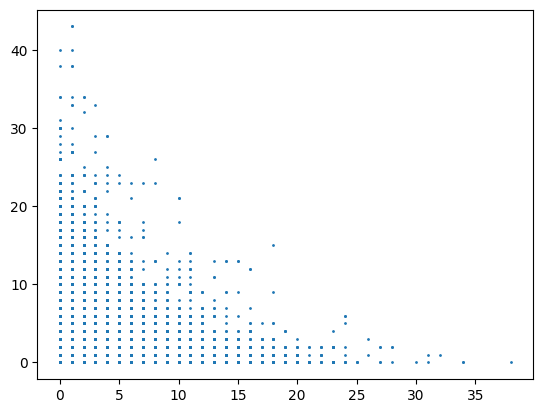

In [25]:
plt.scatter(merged["year_x"], merged["year_y"], s=1)